In [196]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import math

In [197]:
df = pd.read_csv(r"Zhuki_i_gusenitsy.csv", sep=';')

In [198]:
df.head()

,Ширина,Длина,Насекомое
0,10,50,гусеница
1,20,30,жук
2,25,30,жук
3,20,60,гусеница
4,15,70,гусеница


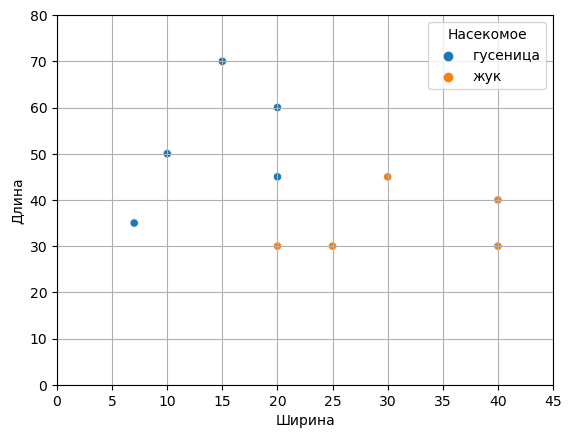

In [199]:
sb.scatterplot(df, x = 'Ширина', y = 'Длина', hue = 'Насекомое')
plt.grid()
plt.ylim(0, 80)
plt.xticks(range(0, 50, 5))
plt.show()

In [200]:
#Расставление меток
labels = []
for i in range(df.shape[0]):
    if df.iloc[i]['Насекомое'] == 'жук':
        labels.append(1)
    else:
        labels.append(-1)
df['Метка'] = labels

In [201]:
t = 0.07
N = 10
w1 = [0, -1]
while(N > 0):
    for i in range(df.shape[0]):
        row = df.iloc[i]
        width = row['Ширина']
        length = row['Длина']
        label = row['Метка']
        if np.sign(w1[0] * width + w1[1] * length) * label < 0:
            w1[0] = w1[0] + t * label
    Q = 0
    for i in range(df.shape[0]):
        row = df.iloc[i]
        width = row['Ширина']
        length = row['Длина']
        label = row['Метка']
        M = np.sign(w1[0] * width + w1[1] * length) * label
        Q += M if M < 0 else 0
    N -=1
    if Q == 0:
        break
w1, N

([1.540000000000001, -1], 3)

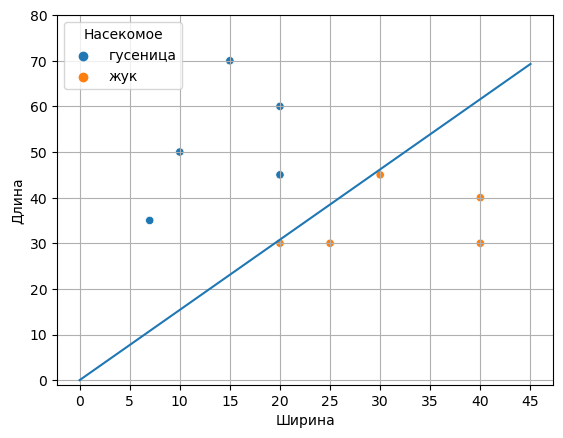

In [202]:
sb.scatterplot(df, x = 'Ширина', y = 'Длина', hue = 'Насекомое')
plt.grid()
plt.ylim(-1, 80)
plt.xticks(range(0, 50, 5))
x = np.linspace(0, 45, 5)
plt.plot(x, x*w1[0])

In [203]:
X = np.array([[1]*10, list(df['Ширина']), list(df['Длина'])]).T
Y = np.array(list(df['Метка']))
w2 = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y.T))
k2 = -w2[1]/w2[2]

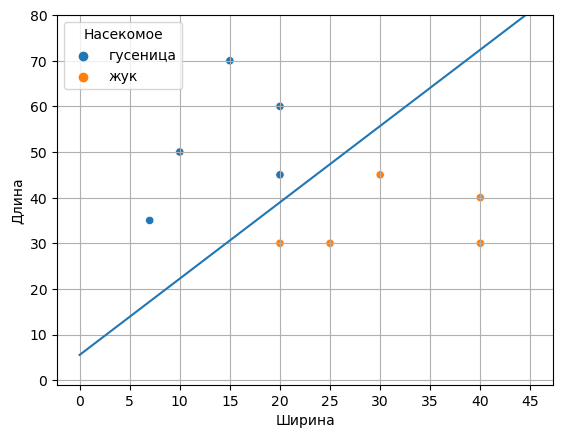

In [204]:
sb.scatterplot(df, x = 'Ширина', y = 'Длина', hue = 'Насекомое')
plt.grid()
plt.ylim(-1, 80)
plt.xticks(range(0, 50, 5))
plt.plot(x, x*k2-w2[0]/w2[2])

0 0.9911222974353342
100 0.4763452067805295


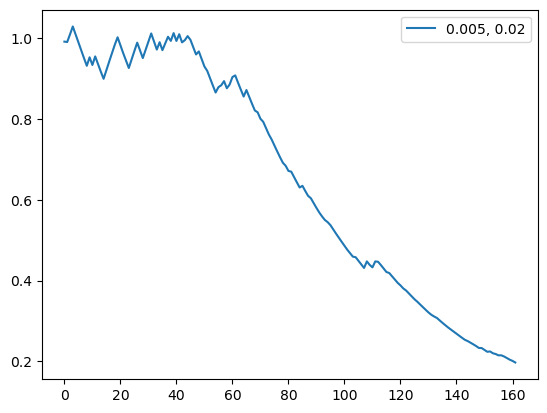

In [205]:
# Сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

def grad(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


def SGD(data, t, l):
    w3 = (np.random.rand(3, 1)*0.01).reshape(3)
    x = np.array(list([1, *data.iloc[i][:2]] for i in range(data.shape[0])))
    y = np.array(list(data.iloc[i][-1] for i in range(data.shape[0])))

    # Начальное вычисление функционала качества
    Q = np.mean([loss(w3, x1, y1) for x1, y1 in zip(x, y)])
    QArray = [Q]
    N = 500
    for i in range(N):
        k = np.random.randint(0, 10)  # случайный индекс
        ek = loss(w3, x[k], y[k])  # вычисление потерь для выбранного вектора
        w3 = w3 - t * grad(w3, x[k], y[k])  # корректировка весов по SGD
        Q = l * ek + (1 - l) * Q  # пересчет показателя качества
        QArray.append(Q)
        if i%100 == 0:
            print(i, Q)
        if Q<0.2:
            break
    return w3, QArray

wSGDt, QArraylistt = SGD(df.copy(), 0.005, 0.02)
plt.plot(QArraylistt, label=str(0.005)+ ', ' + str(0.02))
plt.legend()

0 0.9901104555268326
100 0.4534469063469951
0.2512234646216176


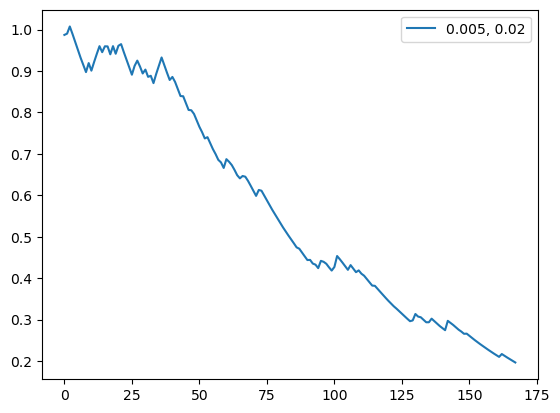

In [210]:
def SGD2(data, t0, l, T):
    w3 = (np.random.rand(3, 1)*0.01).reshape(3)
    x = np.array(list([1, *data.iloc[i][:2]] for i in range(data.shape[0])))
    y = np.array(list(data.iloc[i][-1] for i in range(data.shape[0])))

    # Начальное вычисление функционала качества
    Q = np.mean([loss(w3, x1, y1) for x1, y1 in zip(x, y)])
    QArray = [Q]
    N = 1000
    t = t0
    for i in range(N):
        k = np.random.randint(0, 10)  # случайный индекс
        ek = loss(w3, x[k], y[k])  # вычисление потерь для выбранного вектора
        w3 = w3 - t * grad(w3, x[k], y[k])  # корректировка весов по SGD
        Q = l * ek + (1 - l) * Q  # пересчет показателя качества
        QArray.append(Q)
        if i%100 == 0:
            print(i, Q)
        t = t0*np.exp(1 - N/T)
        if Q<0.2:
            break
    Q = np.mean([loss(w3, x1, y1) for x1, y1 in zip(x, y)])
    print(Q)
    return w3, QArray

wSGDt, QArraylistt = SGD2(df.copy(), 0.005, 0.02, 1000)
plt.plot(QArraylistt, label=str(0.005)+ ', ' + str(0.02))
plt.legend()


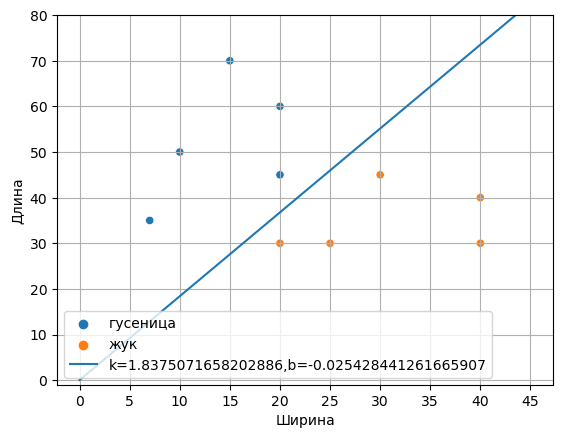

In [207]:
sb.scatterplot(df, x = 'Ширина', y = 'Длина', hue = 'Насекомое')
plt.grid()
plt.ylim(-1, 80)
plt.xticks(range(0, 50, 5))
plt.plot(x, x * (-wSGDt[1]/wSGDt[2]) - wSGDt[0]/wSGDt[2], label = 'k=' + str(-wSGDt[1]/wSGDt[2]) + ',b=' + str(wSGDt[0]/wSGDt[2]))
plt.legend()